In [11]:
#import requirements
import numpy as np
import pandas as pd
import hashlib
import json
import pytz
from datetime import datetime
import matplotlib.pyplot as plt

READING THE FILE

In [12]:
df = pd.read_json("DataEngineeringQ2.json")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               31 non-null     object
 1   appointmentId     31 non-null     object
 2   patientDetails    31 non-null     object
 3   phoneNumber       31 non-null     object
 4   consultationData  31 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [14]:
df.head()

,_id,appointmentId,patientDetails,phoneNumber,consultationData
0,T6hf3rb5,40d2-9c9f,"{'_id': 'T6hb630b3', 'firstName': 'Css', 'last...",96686896670,"{'adviceTemplates': [], 'advices': [], 'attach..."
1,T65g3rb5,40dbtc9f,"{'_id': 'T6h33b300', 'firstName': 'Lokesh', 'l...",9496368916,"{'adviceTemplates': [], 'advices': [], 'attach..."
2,T7g6Srb5,g3Wt5c9f,"{'_id': 'TjhB4373', 'phrId': '63b5hvy614d5', '...",7787204833,"{'adviceTemplates': [], 'advices': [], 'attach..."
3,94bg8W8d,fb6-a535,"{'_id': '6df4R5b', 'phrId': '644nig7y', 'first...",9376756879,"{'adviceTemplates': [], 'advices': [], 'attach..."
4,T6h8H56c,67h7KL9,"{'_id': 'lK9hy06a', 'firstName': 'Raghu Viju',...",5267384241,"{'adviceTemplates': [], 'advices': [], 'attach..."


In [15]:
df = df[['appointmentId', 'phoneNumber', 'patientDetails', 'consultationData']]


df['firstName'] = df['patientDetails'].apply(lambda x: x.get('firstName'))
df['lastName'] = df['patientDetails'].apply(lambda x: x.get('lastName'))
df['gender'] = df['patientDetails'].apply(lambda x: x.get('gender'))
df['DOB'] = df['patientDetails'].apply(lambda x: x.get('birthDate'))
df['medicines'] = df['consultationData'].apply(lambda x: x.get('medicines'))


df['gender'] = df['gender'].map({'M': 'male', 'F': 'female'}).fillna('others')

df = df.drop(['patientDetails', 'consultationData'], axis=1)

print(df)

   appointmentId     phoneNumber                 firstName     lastName  \
0      40d2-9c9f     96686896670                       Css                
1       40dbtc9f      9496368916                    Lokesh                
2       g3Wt5c9f      7787204833                     Shila          Das   
3       fb6-a535      9376756879                   Bhavika  Ben Panchal   
4        67h7KL9      5267384241                Raghu Viju                
5         Hy7Y91   +919826374025              Dinesh Kumar                
6      10dY8a-4a      7587265252                     Lalit     Sankhwal   
7       e8056Ye8      5586958767                      Ravi                
8      dbc0-c66b      9987602525                    Dinesh                
9         1576a7      9234354366                    Sanjay                
10       b6Te4ac      4863281056                    Akshay       Akshay   
11        bu5Qfb      8687986800                   Nirmala                
12       86U8Y45         

In [16]:
df['fullName'] = df['firstName'] + ' ' + df['lastName']

In [17]:
def is_valid_mobile(number):
    if number.startswith('+91') or number.startswith('91'):
        number = number[3:]  # Remove the prefix
    if len(number) == 10 and number.isdigit() and 6000000000 <= int(number) <= 9999999999:
        return True
    else:
        return False


df['isValidMobile'] = df['phoneNumber'].apply(is_valid_mobile)


print(df)

   appointmentId     phoneNumber                 firstName     lastName  \
0      40d2-9c9f     96686896670                       Css                
1       40dbtc9f      9496368916                    Lokesh                
2       g3Wt5c9f      7787204833                     Shila          Das   
3       fb6-a535      9376756879                   Bhavika  Ben Panchal   
4        67h7KL9      5267384241                Raghu Viju                
5         Hy7Y91   +919826374025              Dinesh Kumar                
6      10dY8a-4a      7587265252                     Lalit     Sankhwal   
7       e8056Ye8      5586958767                      Ravi                
8      dbc0-c66b      9987602525                    Dinesh                
9         1576a7      9234354366                    Sanjay                
10       b6Te4ac      4863281056                    Akshay       Akshay   
11        bu5Qfb      8687986800                   Nirmala                
12       86U8Y45         

In [18]:
def hash_phone_number(number):
    return hashlib.sha256(number.encode()).hexdigest()


df['phoneNumberHash'] = df['phoneNumber'].apply(lambda x: hash_phone_number(x) if is_valid_mobile(x) else None)

print(df)

   appointmentId     phoneNumber                 firstName     lastName  \
0      40d2-9c9f     96686896670                       Css                
1       40dbtc9f      9496368916                    Lokesh                
2       g3Wt5c9f      7787204833                     Shila          Das   
3       fb6-a535      9376756879                   Bhavika  Ben Panchal   
4        67h7KL9      5267384241                Raghu Viju                
5         Hy7Y91   +919826374025              Dinesh Kumar                
6      10dY8a-4a      7587265252                     Lalit     Sankhwal   
7       e8056Ye8      5586958767                      Ravi                
8      dbc0-c66b      9987602525                    Dinesh                
9         1576a7      9234354366                    Sanjay                
10       b6Te4ac      4863281056                    Akshay       Akshay   
11        bu5Qfb      8687986800                   Nirmala                
12       86U8Y45         

In [22]:
def calculate_age(birth_date):
    try:
        if pd.notnull(birth_date):
            current_year = pd.Timestamp.now().year
            birth_year = pd.to_datetime(birth_date).year
            return int(current_year - birth_year)
    except KeyError:
        pass
    return None

df['Age'] = df['DOB'].apply(calculate_age)

In [23]:
print(df)

   appointmentId     phoneNumber                 firstName     lastName  \
0      40d2-9c9f     96686896670                       Css                
1       40dbtc9f      9496368916                    Lokesh                
2       g3Wt5c9f      7787204833                     Shila          Das   
3       fb6-a535      9376756879                   Bhavika  Ben Panchal   
4        67h7KL9      5267384241                Raghu Viju                
5         Hy7Y91   +919826374025              Dinesh Kumar                
6      10dY8a-4a      7587265252                     Lalit     Sankhwal   
7       e8056Ye8      5586958767                      Ravi                
8      dbc0-c66b      9987602525                    Dinesh                
9         1576a7      9234354366                    Sanjay                
10       b6Te4ac      4863281056                    Akshay       Akshay   
11        bu5Qfb      8687986800                   Nirmala                
12       86U8Y45         

In [24]:
def calculate_no_of_medicines(consultation_data):
    try:
        medicines = consultation_data['medicines']
        return len(medicines)
    except (KeyError, TypeError):
        return None

def calculate_no_of_active_medicines(consultation_data):
    try:
        medicines = consultation_data['medicines']
        return sum(med['isActive'] for med in medicines)
    except (KeyError, TypeError):
        return None

def calculate_no_of_inactive_medicines(consultation_data):
    try:
        medicines = consultation_data['medicines']
        return sum(not med['isActive'] for med in medicines)
    except (KeyError, TypeError):
        return None

def get_medicine_names(consultation_data):
    try:
        medicines = consultation_data['medicines']
        return ', '.join(med['medicineName'] for med in medicines if med['isActive'])
    except (KeyError, TypeError):
        return None

df['noOfMedicines'] = df.apply(lambda row: calculate_no_of_medicines(row.get('consultationData')), axis=1)
df['noOfActiveMedicines'] = df.apply(lambda row: calculate_no_of_active_medicines(row.get('consultationData')), axis=1)
df['noOfInactiveMedicines'] = df.apply(lambda row: calculate_no_of_inactive_medicines(row.get('consultationData')), axis=1)
df['medicineNames'] = df.apply(lambda row: get_medicine_names(row.get('consultationData')), axis=1)

In [25]:
df.head()

,appointmentId,phoneNumber,firstName,lastName,gender,DOB,medicines,fullName,isValidMobile,phoneNumberHash,Age,noOfMedicines,noOfActiveMedicines,noOfInactiveMedicines,medicineNames
0,40d2-9c9f,96686896670,Css,,others,None,"[{'medicineId': '619404', 'medicineName': 'A',...",Css,False,None,NaN,None,None,None,None
1,40dbtc9f,9496368916,Lokesh,,male,1996-05-16T18:30:00.000Z,"[{'medicineId': '619404', 'medicineName': 'A',...",Lokesh,True,895215dc5419e347db19d058296f7c490536e8a309a562...,28.0,None,None,None,None
2,g3Wt5c9f,7787204833,Shila,Das,others,None,"[{'medicineId': '619404', 'medicineName': 'B',...",Shila Das,True,35b812a459810275cc320ee5629c9a6f0d40ed49a429f7...,NaN,None,None,None,None
3,fb6-a535,9376756879,Bhavika,Ben Panchal,female,1988-04-24T14:30:00.000Z,"[{'medicineId': '619704', 'medicineName': 'B',...",Bhavika Ben Panchal,True,353262b7228e47c5390bc25b1cafcceeba2b8eda66bab5...,36.0,None,None,None,None
4,67h7KL9,5267384241,Raghu Viju,,others,None,"[{'medicineId': '619384', 'medicineName': 'D',...",Raghu Viju,False,None,NaN,None,None,None,None


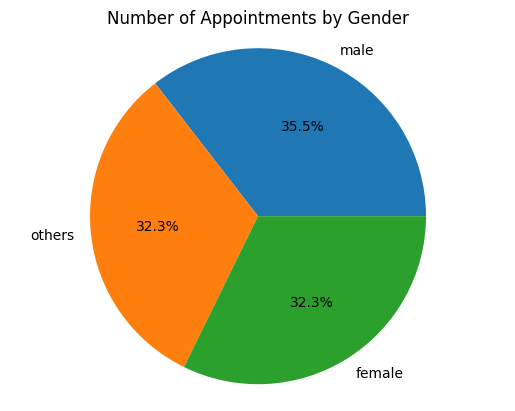

In [26]:
# today = datetime.now(pytz.timezone('UTC'))
# df['Age'] = (today - pd.to_datetime(df['DOB'])).astype('<m8[Y]')


final_df = df[['appointmentId', 'fullName', 'phoneNumber', 'isValidMobile', 'phoneNumberHash', 'gender',
               'DOB', 'Age', 'noOfMedicines', 'noOfActiveMedicines', 'noOfInactiveMedicines', 'medicineNames']]


final_df.to_csv('ANALYSIS.csv', index=False, sep='~')


aggregated_data = {
    'Age': int(df['Age'].count()),
    'gender': df['gender'].value_counts().to_dict(),
    'validPhoneNumbers': int(df['isValidMobile'].sum()),
    'appointments': int(df['appointmentId'].nunique()),
    'medicines': int(df['noOfMedicines'].sum()),
    'activeMedicines': int(df['noOfActiveMedicines'].sum())
}


# with open('DataEngineeringQ2.json', 'w') as f:
#     json.dump(aggregated_data, f)

gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Number of Appointments by Gender')
plt.axis('equal')
plt.show()